# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [47]:
df = pd.read_csv("data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [48]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [49]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [51]:
print(df.groupby("Clicked on Ad").size())

Clicked on Ad
0    500
1    500
dtype: int64


<Figure size 1000x800 with 0 Axes>

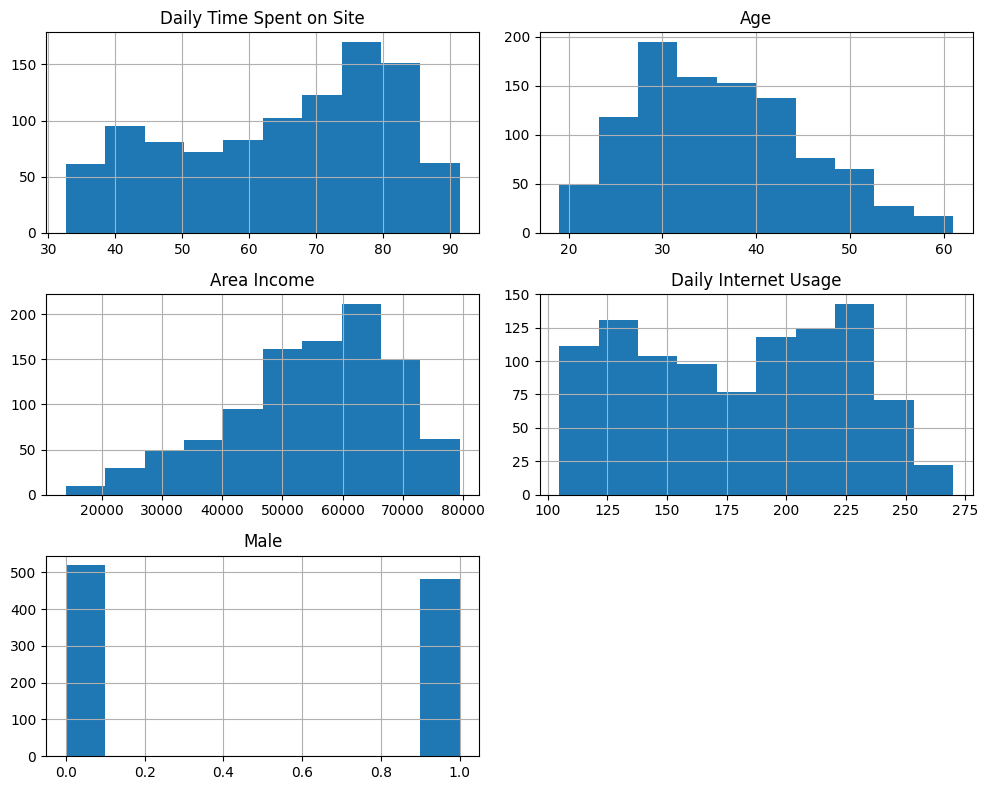

In [52]:
plt.figure(figsize=(10, 8))
axes = df.drop("Clicked on Ad", axis=1).hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

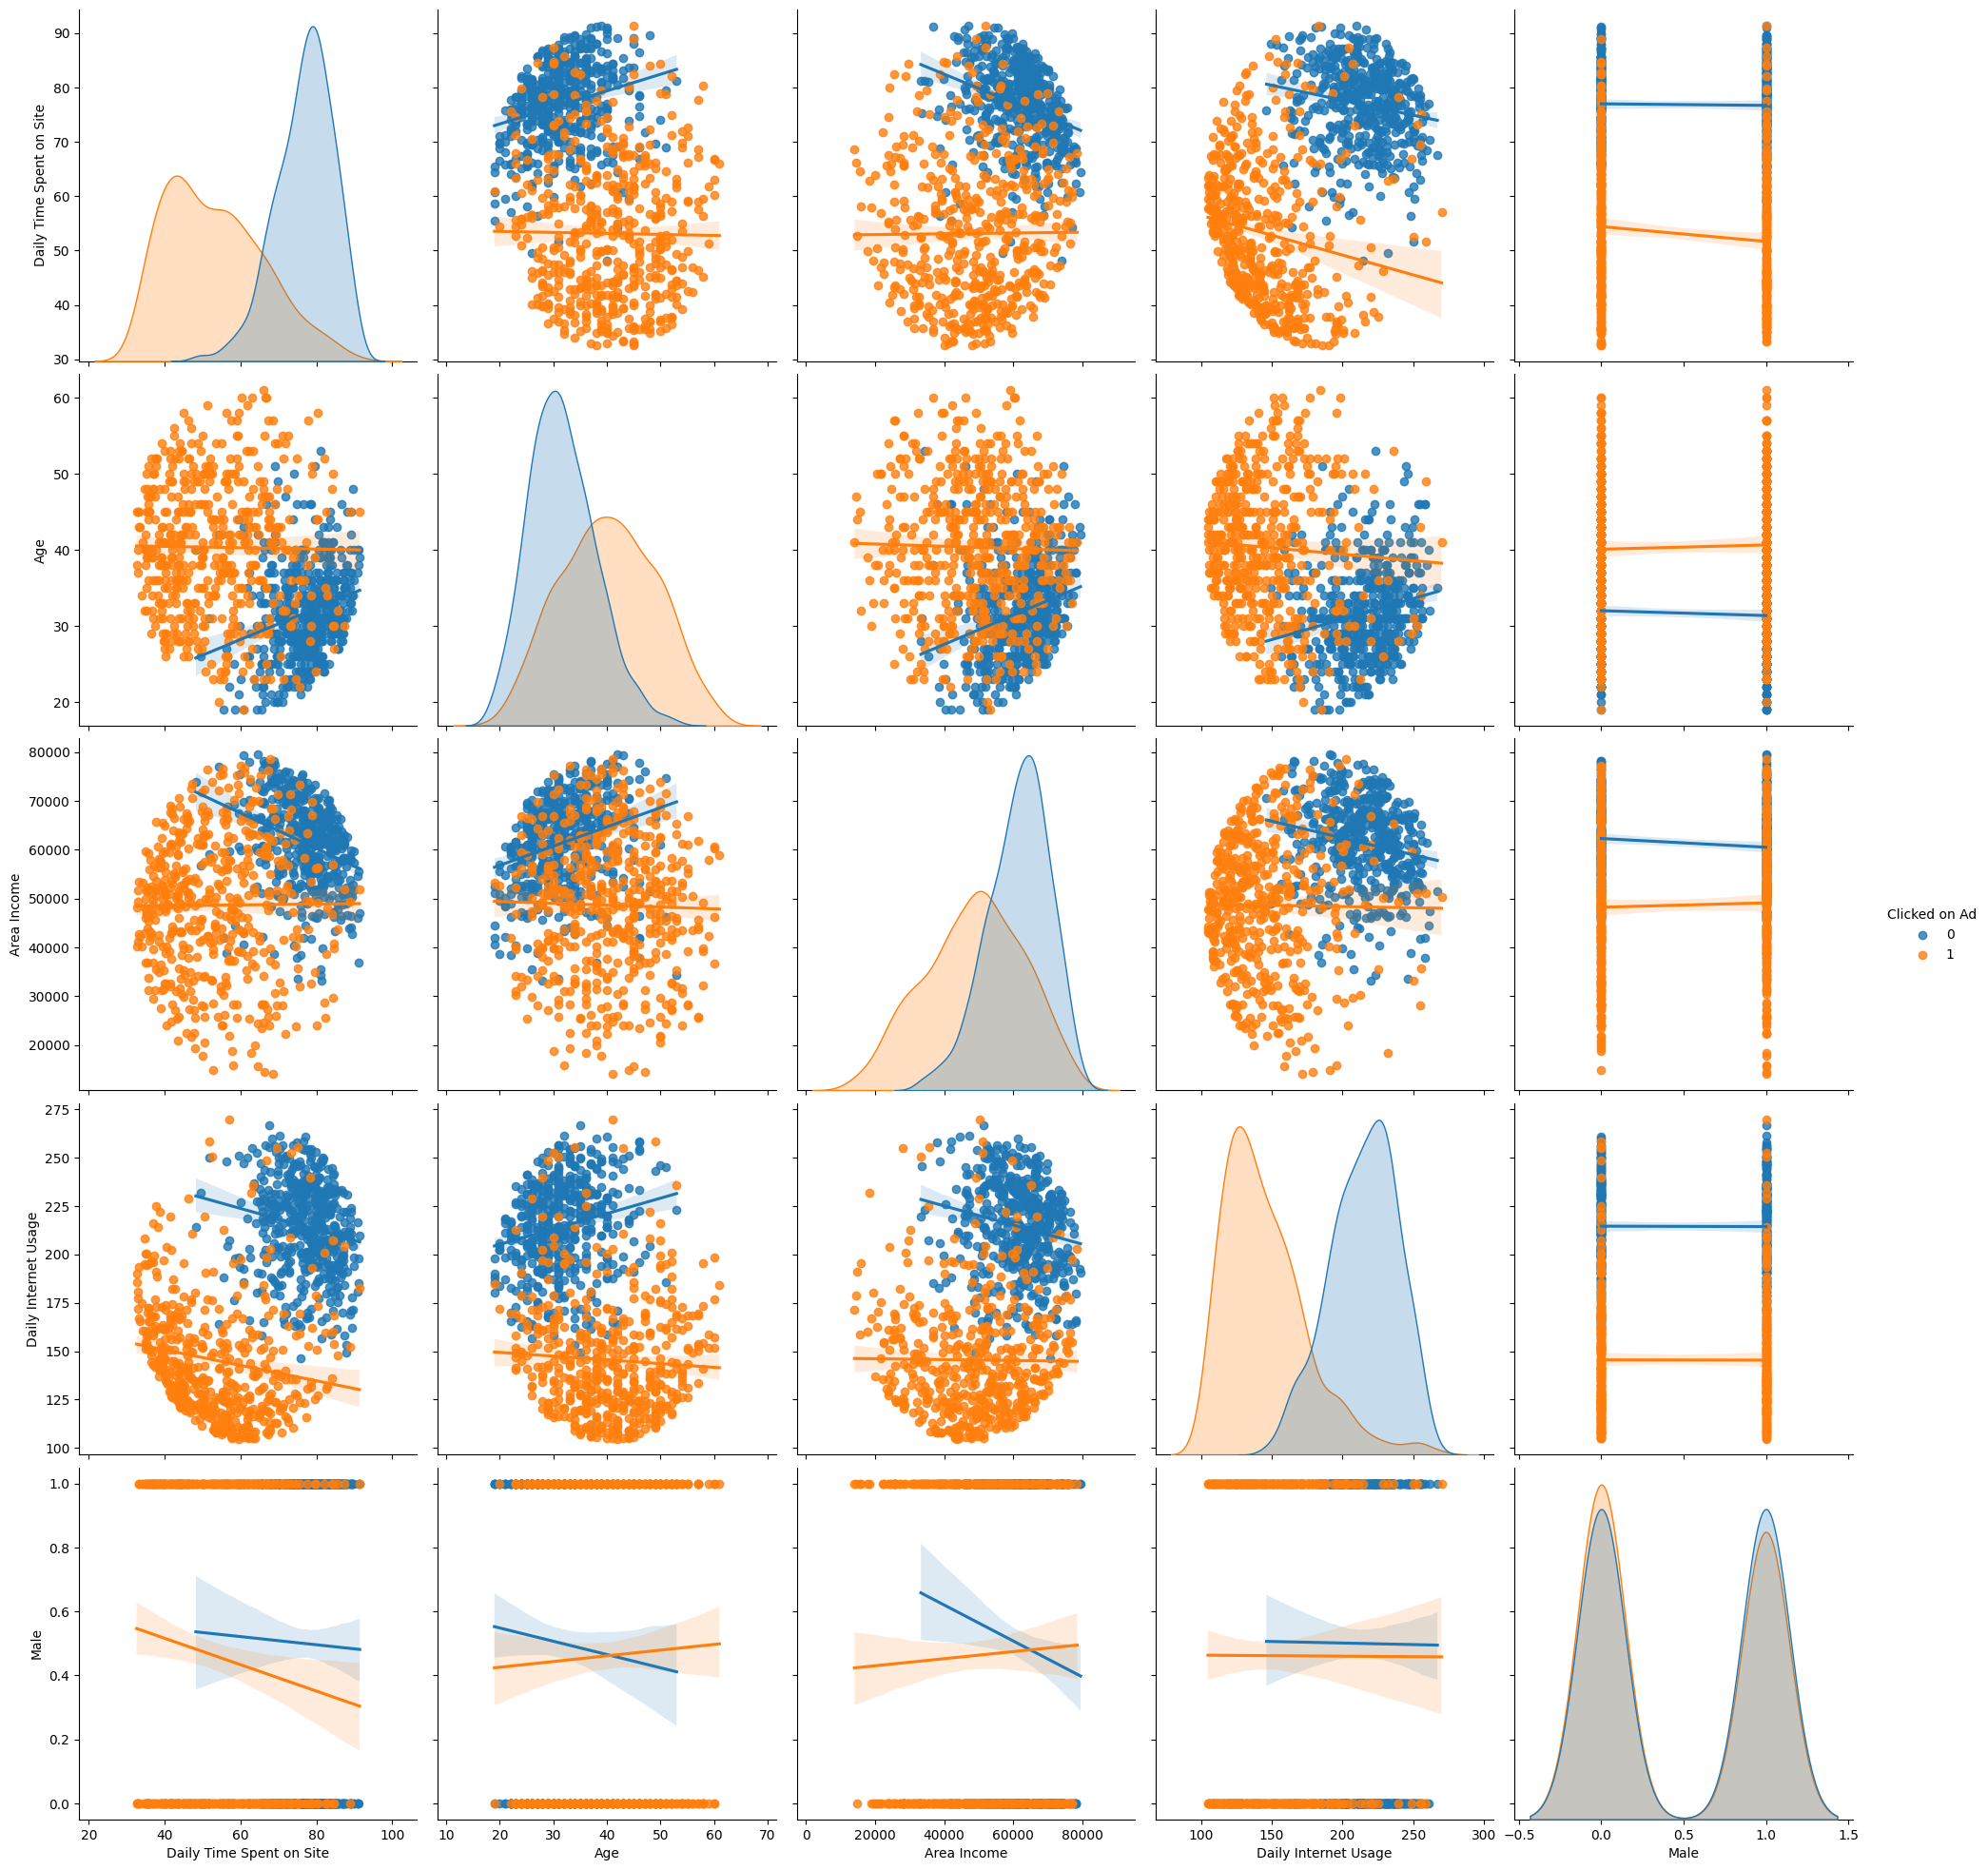

In [53]:
sns.pairplot(df.dropna(),
            hue="Clicked on Ad",
            height=4,
            vars=["Daily Time Spent on Site", "Age","Area Income","Daily Internet Usage","Male"],
            kind="reg"); # "reg" de regresión lineal

<Axes: >

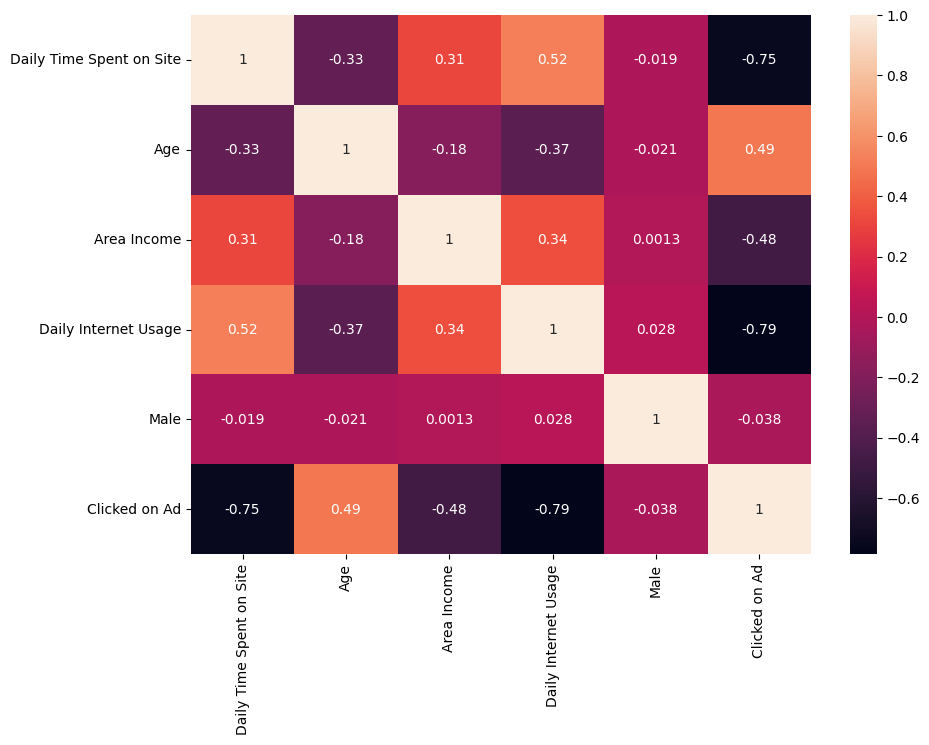

In [54]:
plt.figure(figsize=(10, 7))
data_int = ["Daily Time Spent on Site", "Age","Area Income","Daily Internet Usage","Male","Clicked on Ad"]
sns.heatmap(df[data_int].corr(), annot=True)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop(["Timestamp", "Ad Topic Line", "Country", "City", "Clicked on Ad"], axis=1)
y = df["Clicked on Ad"]

In [57]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64


#### 2. Train test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### 3. StandardScaler()


In [60]:
escalador = StandardScaler()
X_train_scaled = escalador.fit_transform(X_train)
X_test_scaled = escalador.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [61]:
X = np.array(X_train_scaled)
y = np.array(y_train)

In [62]:
X

array([[ 0.66499447,  0.30753332,  0.6842786 ,  1.52106049,  1.04381619],
       [-1.19503265, -0.47650064,  0.79385516, -0.75764596, -0.95802308],
       [ 0.27364125, -1.2605346 ,  0.81544168,  0.73429367, -0.95802308],
       ...,
       [ 1.65248607,  0.97956243, -0.21264408,  0.0339071 ,  1.04381619],
       [-0.52791046,  0.64354788,  1.32636636, -0.95137476, -0.95802308],
       [ 1.56077247,  0.41953817,  0.35607887,  0.29783409, -0.95802308]],
      shape=(700, 5))

In [63]:
y.shape

(700,)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [66]:
predictions = model.predict(X_test_scaled)
print(predictions)

[1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1
 0 1 1 0]


In [67]:
predicions_proba = model.predict_proba(X_test_scaled)
print(np.round(np.array(predicions_proba), 2))

[[0.02 0.98]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.53 0.47]
 [0.98 0.02]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.96 0.04]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [0.   1.  ]
 [0.88 0.12]
 [1.   0.  ]
 [0.   1.  ]
 [0.97 0.03]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.85 0.15]
 [0.54 0.46]
 [0.99 0.01]
 [0.02 0.98]
 [0.   1.  ]
 [0.99 0.01]
 [0.99 0.01]
 [0.39 0.61]
 [0.   1.  ]
 [0.   1.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.43 0.57]
 [0.   1.  ]
 [0.99 0.01]
 [0.93 0.07]
 [0.02 0.98]
 [0.   1.  ]
 [0.76 0.24]
 [0.   1.  ]
 [0.   1.  ]
 [0.96 0.04]
 [0.   1.  ]
 [0.98 0.02]
 [0.99 0.01]
 [0.99 0.01]
 [0.98 0.02]
 [0.   1.  ]
 [0.98 0.02]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.97 0.03]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.15 0.85]
 [0.95 0.05]
 [0.16 0.84]
 [0.47 0.53]
 [1.   0.  ]

In [68]:
model.score(X, y)

0.9742857142857143

In [69]:
model.classes_

array([0, 1])

# 4. Evaluation



#### 1. Confusion Matrix


In [70]:
from sklearn.metrics import confusion_matrix

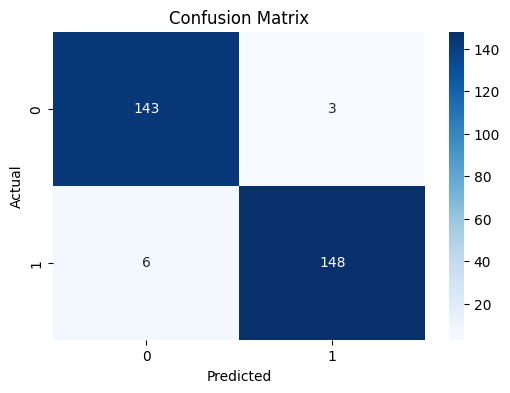

In [72]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Vemos una matriz con los datos muy concentrados en la diagonal, con lo cual vemos que el modelo tiene buen rendimiento


#### 2. Precision


In [73]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score

In [74]:
multilabel_confusion_matrix(y_test, predictions)

array([[[148,   6],
        [  3, 143]],

       [[143,   3],
        [  6, 148]]])

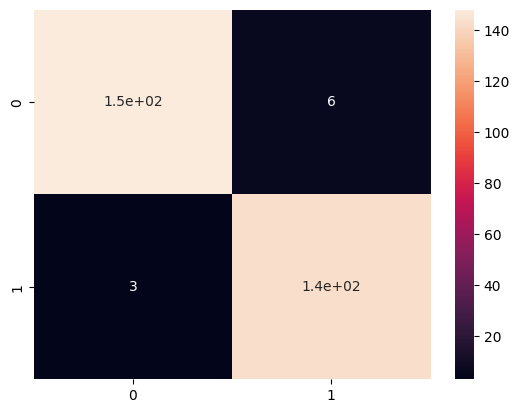

In [78]:
sns.heatmap(multilabel_confusion_matrix(y_test, predictions)[0], annot=True);

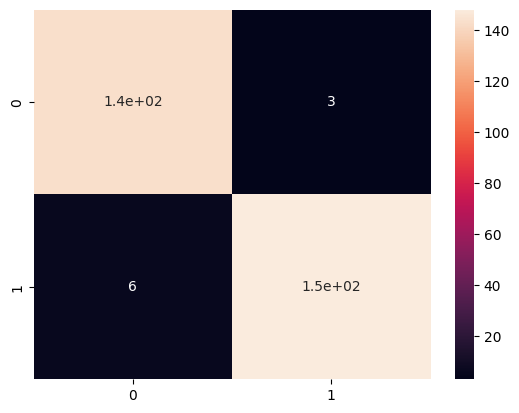

In [79]:
sns.heatmap(multilabel_confusion_matrix(y_test, predictions)[1], annot=True);

In [80]:
precision = precision_score(y_test, predictions)
print(f"Precision: {precision:.2f}")

Precision: 0.98


El 98% de mis predicciones positivas (hizo click en el anuncio) fueron correctas



#### 3. Recall


In [81]:
recall = recall_score(y_test, predictions)
print(f"Recall: {recall:.2f}")

Recall: 0.96


De todos los casos que eran positivos el modelo ha predecido correctamente el 96 % de ellos



#### 4. F1 Score


In [ ]:
f1 = f1_score(y_test, predictions) # Muy útil para clases balanceadas como es en este caso
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.97




#### 5. ROC curve

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

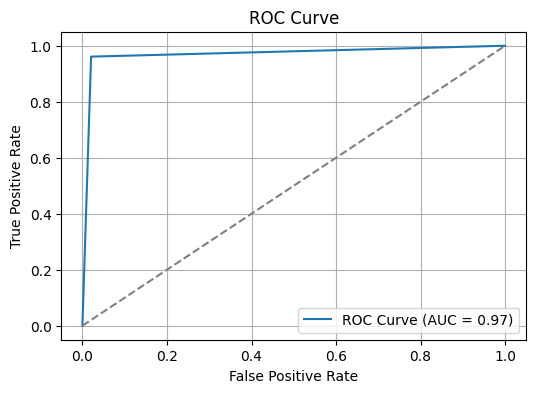

In [90]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

La curva ROC crea prácticamente un ángulo recto, con un AUC muy cercano a 1 (modelo perfecto)



#### 6. P-R curve

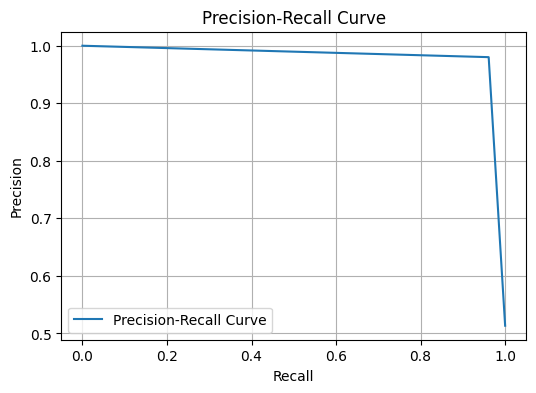

In [91]:
precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.legend()
plt.show()